# Loan Prediction
*Predicts if the loan requested by an applicant will be approved. A classification problem.*

[Data Source](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/)

---------

### Environment Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') # supress warnings

### Data Preview
There are 2 sets of datasets given for this project, `train.csv` and `test.csv`. `train.csv` is used to train our model for it to be used in predicting loan amounts in `test.csv`. For now, we can load just the combine both data for training.

In [2]:
train_dir = '../data/processed/train.csv'
train_data = pd.read_csv(train_dir)

### Quick Data Exploration
We now can quickly skim through the data and infer some observations.

The columns as described as follows:

|Variable|Description|
|--------|-----------|
|Loan_ID|Unique Loan ID|
|Gender|Male/ Female|
|Married|Applicant married (Y/N)|
|Dependents|Number of dependents|
|Education|Applicant Education (Graduate/ Under Graduate)|
|Self_Employed|Self employed (Y/N)|
|ApplicantIncome|Applicant income|
|CoapplicantIncome|Coapplicant income|
|LoanAmount|Loan amount in thousands|
|Loan_Amount_Term|Term of loan in months|
|Credit_History|credit history meets guidelines|
|Property_Area|Urban/ Semi Urban/ Rural|
|Loan_Status|Loan approved (Y/N)|

In [3]:
train_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Use `describe()` to describe the numerical fields.

In [4]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Here are what we can infer from the data:
- `LoanAmount` has 22 missing values
- `Loan_Amount_Term` has 14 missing values
- `Credit_History` has 50 missing values
- 84% of the people meets the credit history guidelines
- `ApplicantIncome` and `CoapplicantIncome` are inline with the expectations

### Continuous Distribution Analysis

Let us look at the distribution of `ApplicantIncome`.

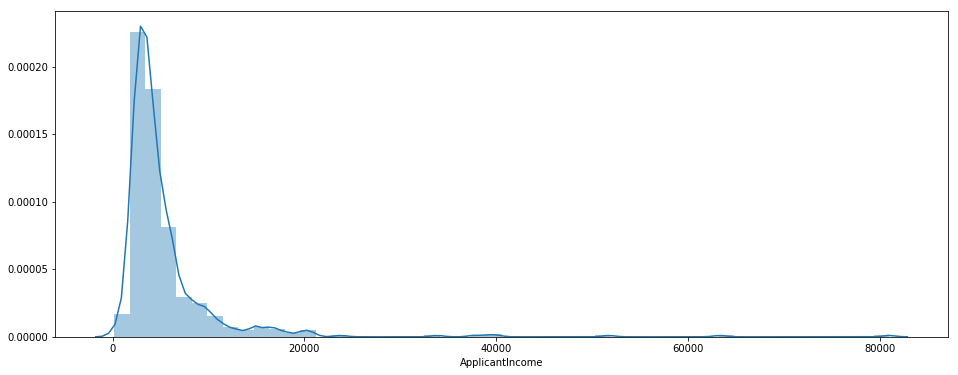

In [5]:
plt.figure(figsize=(16,6)) # increases plot size
sns.distplot(train_data['ApplicantIncome'].fillna(axis=0, method='bfill')) # temporarily fill NaN with values in next row

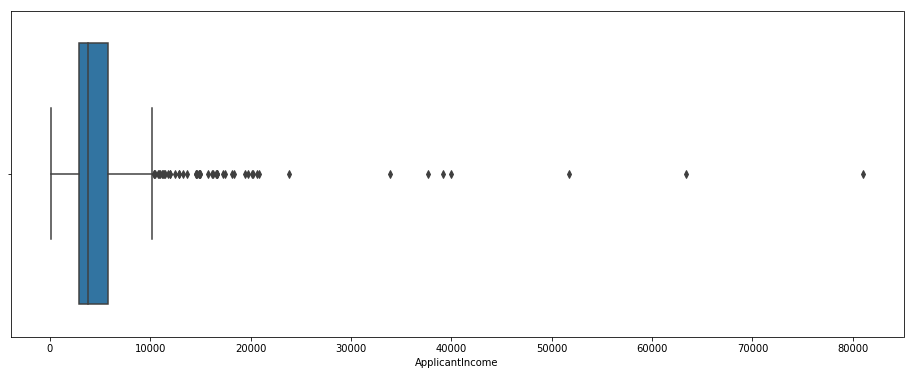

In [6]:
plt.figure(figsize=(16,6))
sns.boxplot(train_data['ApplicantIncome'].fillna(axis=0, method='bfill'))

There are extreme values for this column. There might be a correlation between income and education levels, let's try segregating them by Education.


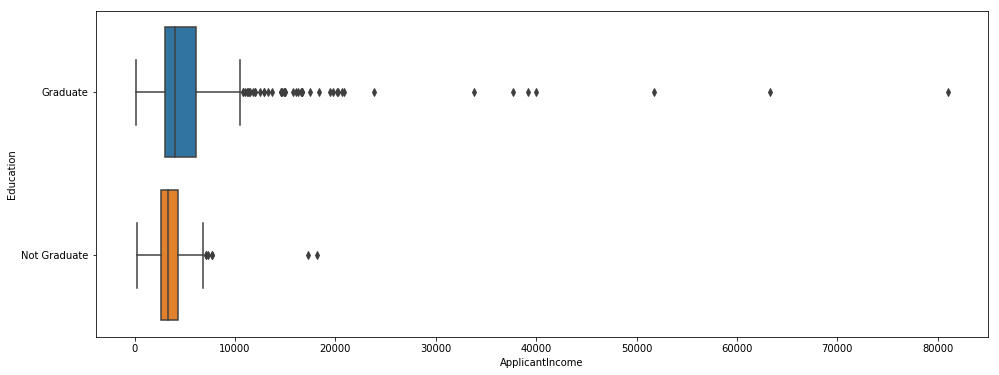

In [7]:
plt.figure(figsize=(16,6))
sns.boxplot(x='ApplicantIncome', y='Education', data=train_data.fillna(axis=0, method='bfill'))

It seems that the mean of the applicant incomes are very similar, but there appears to be more of graduates which have higher income than non-graduates, which appears to be outliers.

Let's now look into the `LoanAmount` disctibution.

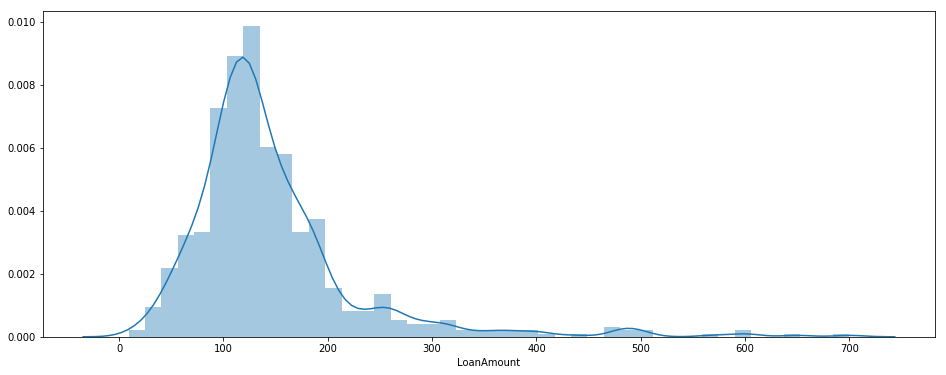

In [8]:
plt.subplots(figsize=(16,6))
sns.distplot(train_data['LoanAmount'].fillna(axis=0, method='bfill'))

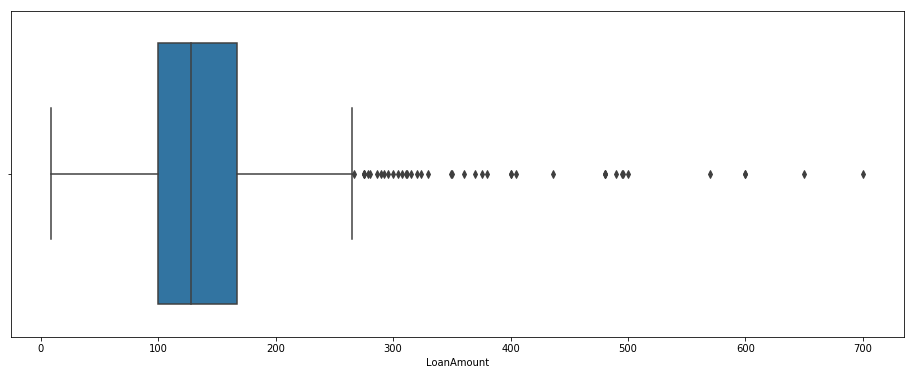

In [9]:
plt.subplots(figsize=(16,6))
sns.boxplot(train_data['LoanAmount'].fillna(axis=0, method='bfill'))

There are obviously some extreme values which needs further treatment.

### Categorical Value Analysis
We will now look into the categorical values and observer their correlation. We will look at `CreditHistory` and `LoanStatus`. `CreditHistory` is the reliability record of the applicant (e.g. wether previously they are able to return their loans). `LoanStatus` is the approval of their loan request, we must first map these into `1` and `0`, in order to properly analyse these boolean values.


In [10]:
temp1 = train_data['Credit_History'].value_counts(ascending=True)
temp2 = train_data.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc=lambda x : x.map({'Y':1, 'N':0}).mean())

print('Credit History freq. table:')
print(temp1)

print('\nProbability for loan request acceptance for each Credit_History class:')
print(temp2)

Credit History freq. table:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability for loan request acceptance for each Credit_History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


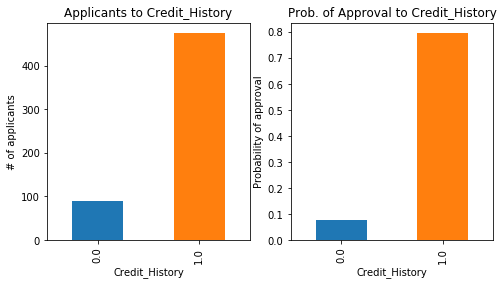

In [11]:
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(121)
ax1.set_title('Applicants to Credit_History')
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('# of applicants')
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
ax2.set_title('Prob. of Approval to Credit_History')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of approval')
temp2['Loan_Status'].plot(kind='bar')

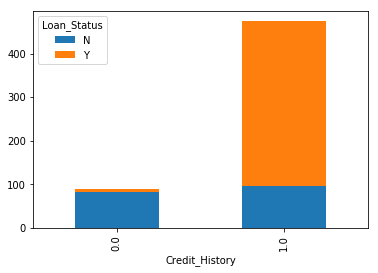

In [12]:
temp3 = pd.crosstab(train_data['Credit_History'], train_data['Loan_Status'])
temp3.plot(kind='bar', stacked=True)

### Data Processing
We will now process the data for a better yield, missing values will be filled, extreme values will be normalized, and categorical fields being encoded (if needed).

For missing data, there are 2 different ways:
- Fill with `mean` or `mode` (for continuous and categorical respectively)
- Create a supervised learning model to predict the missing values

For simplicity in this project, we'll use the first one. Let's first check the missing value counts.

In [13]:
train_data.apply(lambda x : sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Start filling the missing values.

In [14]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True) # mode() for categorical values
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(), inplace=True) # mean() for continuous values

At this point, our data has been filled, but there are some columns where there are still extreme values, like `LoanAmount` and `ApplicantIncome` as we have explored before. An approach to this problem it to normalize them using logarithmic function.

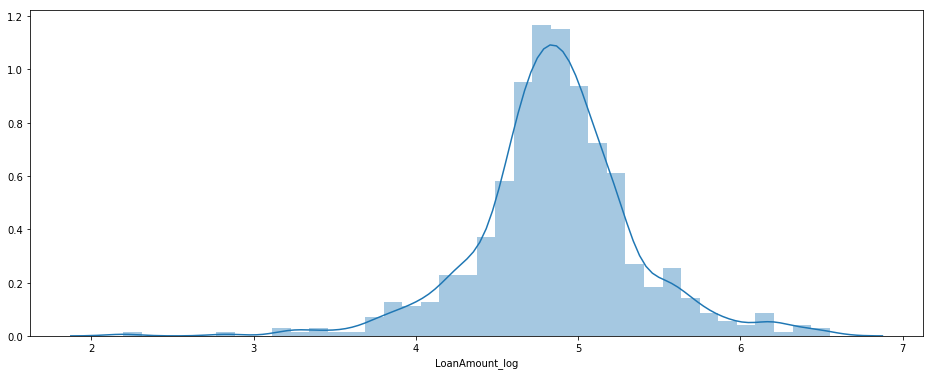

In [15]:
train_data['LoanAmount_log'] = np.log(train_data['LoanAmount'])
plt.subplots(figsize=(16,6))
sns.distplot(train_data['LoanAmount_log'])

Our `LoanAmount_log` data now has a more normal distribution, just as we wanted.

For `ApplicantIncome`, an intuition is that, someone may have low income but higher support income (`CoapplicantIncome`). So it may be a good idea to add them up together then normalize it.

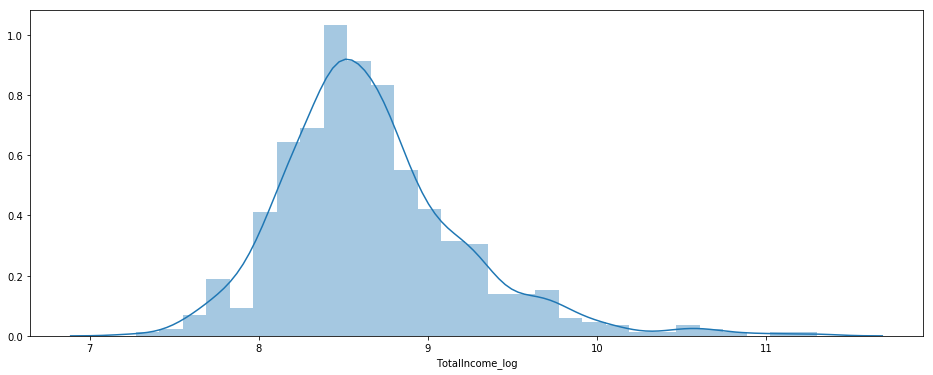

In [16]:
train_data['TotalIncome'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
train_data['TotalIncome_log'] = np.log(train_data['TotalIncome'])
plt.subplots(figsize=(16,6))
sns.distplot(train_data['TotalIncome_log'])

We have some columns which are categorical. The modelling framework we're using, `sklearn` can only take numerical inputs, hence we shall encode out categorical fields. There are 2 ways to encode these:

- Label encoding (BCD)
- One-Hot encoding

We will use label encoding for this project.

In [17]:
from sklearn.preprocessing import LabelEncoder

cat_val = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
lenc = LabelEncoder()

for cat in cat_val:
    train_data[cat] = lenc.fit_transform(train_data[cat])

train_data.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

We can see that all of our fields are now fitted fot our model. Great, we can now proceed to building the model.

### Model Building

There are a lot of classifier algorithms that we can use for our project. We can test the efficiency of these models by simply ttrying them out. The measure of efficiency will be based on the `accuracy` value by doing a K-Flod Cross Validation. We'll make a method to ease this operation.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   # for K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score

def build_model(model, data, X, y):
    model.fit(data[X], data[y])
    pred_y = model.predict(data[X])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy_score(pred_y, data[y])))
    
    kfold = KFold(n_splits=5)
    
    error = []
    for train, test in kfold.split(data[X]):
        train_X = data[X].iloc[train,:]
        train_y = data[y].iloc[train]
        model.fit(train_X, train_y)
        error.append(model.score(data[X].iloc[test,:], data[y].iloc[test]))
    
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    model.fit(data[X], data[y])

#### Logistic Regression
A common approach to designing such classification model is to use Logistic Regression. 

Let's try using just `Credit_History` as the feature.

In [19]:
target_var = 'Loan_Status'
model = LogisticRegression()
features = ['Credit_History']
build_model(model, train_data, features, target_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


Let's try adding more variables for the features.

In [20]:
model = LogisticRegression()
features = ['Credit_History', 'Gender', 'LoanAmount_log', 'Education']
build_model(model, train_data, features, target_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


It seems that there are only a very slight change in the accuracy upon the addition of features, i.e. `Credit_History` is the dominating mode.Let's try comparing these results with another modelling technique.

#### Decision Tree
This approach usually yields a higher accuracy compared to logistic regression.

In [21]:
model = DecisionTreeClassifier()
features = ['Credit_History', 'Gender', 'LoanAmount_log', 'Education']
build_model(model, train_data, features, target_var)

Accuracy : 91.042%
Cross-Validation Score : 69.701%


In [22]:
model = DecisionTreeClassifier()
features = ['Credit_History', 'Loan_Amount_Term', 'LoanAmount_log']
build_model(model, train_data, features, target_var)

Accuracy : 89.414%
Cross-Validation Score : 68.559%


Here we are seeing a high accuracy but a low cross validation value. This is an indication of **overfitting**. Let's try using another model approach.

#### Random Forest
It's another algorithm used for solving classification problem. We can make a Random Forest model to work with all the features, it will return the feature importance matrix which we can the use for further selection.

In [23]:
model = RandomForestClassifier(n_estimators=100)
features = ['Gender', 'Married', 'Dependents', 'Education',
            'Self_Employed', 'Loan_Amount_Term', 'Credit_History',
            'Property_Area', 'LoanAmount_log','TotalIncome_log']
build_model(model, train_data, features, target_var)

Accuracy : 100.000%
Cross-Validation Score : 77.530%


In [24]:
featimp = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print (featimp)

Credit_History      0.267929
TotalIncome_log     0.259910
LoanAmount_log      0.225989
Dependents          0.054708
Property_Area       0.049868
Loan_Amount_Term    0.044053
Married             0.027957
Education           0.026689
Gender              0.022891
Self_Employed       0.020006
dtype: float64


We can pick the top 5 features and use them to build our final model.

In [25]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
features = ['Dependents', 'Credit_History', 'Property_Area', 'LoanAmount_log','TotalIncome_log']
build_model(model, train_data, features, target_var)

Accuracy : 83.388%
Cross-Validation Score : 80.948%


Despite that the accuracy is reduced, the dross validation score is increased, generelizing the model more, hence reducing the overfitting. As we notice, it has a very similar result compared to the Logistic Regression we made earlier, hence we can deduce that using a more sophisticated model does not guarantee a better result.